<a href="https://colab.research.google.com/github/Ravikumarchavva/Ravi-kumar-svce/blob/main/machine%20learning/Copy_of_linear_regmv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!pip install word2number

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=8784ac13a3197f38b9d78e3ee157d45f00cb9d648dcbbe6150573b757e4431a6
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model as lm
from word2number import w2n
from importlib import reload

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience.fillna('zero',inplace=True)
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(),inplace=True)
df['experience']=df['experience'].apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg=lm.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [ ]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [ ]:
reg.intercept_

17737.263464337688

In [ ]:
reg.predict([[10,8,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([65042.94032023])

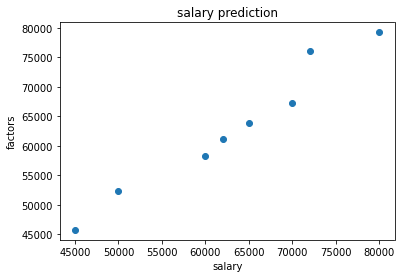

In [22]:
plt=reload(plt)
plt.scatter(df['salary($)'],reg.predict(df[['experience','test_score(out of 10)','interview_score(out of 10)']]))
plt.xlabel('salary')
plt.ylabel('factors')
plt.title('salary prediction')
plt.show()

In [23]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([92002.18340611])

In [27]:
reg.predict([[0,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([17737.26346434])